In [25]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.initializers import TruncatedNormal, Constant
#追加train.py
from tensorflow.keras import utils as np_utils
from tensorflow.keras.optimizers import SGD 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator


#alexnet_cifar10.py
def conv2d(filters, kernel_size, strides=(1, 1), padding='same', bias_init=1, **kwargs):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=bias_init)
    return Conv2D(
        filters, kernel_size, strides=strides, padding=padding,
        activation='relu', kernel_initializer=trunc, bias_initializer=cnst, **kwargs
    )   

def dense(units, activation='tanh'):
    trunc = TruncatedNormal(mean=0.0, stddev=0.01)
    cnst = Constant(value=1)
    return Dense(
        units, activation=activation,
        kernel_initializer=trunc, bias_initializer=cnst,
    )   

def AlexNet(image_size, channel, num_classes):
    model = Sequential()

    #conv1
    model.add(conv2d(96, 3, bias_init=0, input_shape=(image_size, image_size, channel)))
    #pool1
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv2
    model.add(conv2d(256, 5)) 
    #pool2
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #conv3
    model.add(conv2d(384, 3, bias_init=0))
    #conv4
    model.add(conv2d(384, 3)) 
    #conv5
    model.add(conv2d(256, 3)) 
    #pool5
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(BatchNormalization())

    #fc6
    model.add(Flatten())
    model.add(dense(1000))
    model.add(Dropout(0.5))
    #fc7
    model.add(dense(1000))
    model.add(Dropout(0.5))

    #fc8
    model.add(dense(num_classes, activation='softmax'))
    
    return model

#train.py

batch_size = 128 
num_classes = 10
epochs = 50
image_size = 32
channel = 3 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

model = AlexNet(image_size, channel, num_classes)
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_gen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                width_shift_range=4.0/32.0, height_shift_range=4.0/32.0)
test_gen = ImageDataGenerator(rescale=1.0/255)

history = model.fit_generator(train_gen.flow(x_train, y_train, batch_size, shuffle=True),
                        steps_per_epoch=x_train.shape[0]//batch_size,
                        validation_data=test_gen.flow(x_test, y_test, batch_size, shuffle=False),
                        validation_steps=x_test.shape[0]//batch_size,
                        max_queue_size=5, epochs=epochs)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 96)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 384)        

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
390/390 [==============================] - 47s 118ms/step - loss: 2.1337 - accuracy: 0.1700 - val_loss: 2.4486 - val_accuracy: 0.1249
Epoch 2/50
390/390 [==============================] - 46s 117ms/step - loss: 1.7488 - accuracy: 0.3178 - val_loss: 1.6080 - val_accuracy: 0.3988
Epoch 3/50
390/390 [==============================] - 46s 117ms/step - loss: 1.5152 - accuracy: 0.4262 - val_loss: 1.6966 - val_accuracy: 0.3696
Epoch 4/50
390/390 [==============================] - 45s 116ms/step - loss: 1.3312 - accuracy: 0.5108 - val_loss: 1.2055 - val_accuracy: 0.5518
Epoch 5/50
390/390 [==============================] - 46s 117ms/step - loss: 1.2032 - accuracy: 0.5592 - val_loss: 1.3015 - val_accuracy: 0.5359
Epoch 6/50
390/390 [==============================] - 46s 117ms/step - loss: 1.0998 - accuracy: 0.6040 - val_loss: 1.1278 - val_accuracy: 0.5959
Epoch 7/50
390/390 [==============================] - 45s 116ms/step - loss: 1.0074 - accuracy: 0.6408 - val_loss: 1.3119 - val_ac

In [26]:
model.save('alexnet_cifar10_1000_2.h5')

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

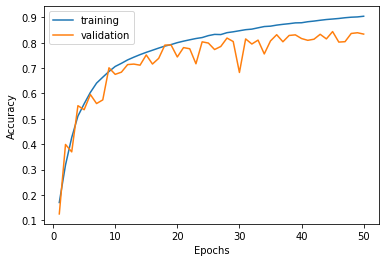

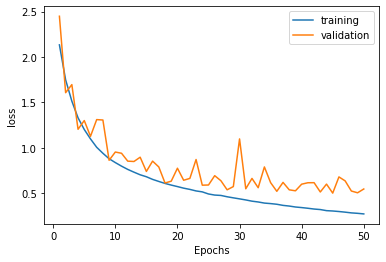

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.plot(range(1, epochs+1), history.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), history.history['val_accuracy'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(range(1, epochs+1), history.history['loss'], label="training")
plt.plot(range(1, epochs+1), history.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


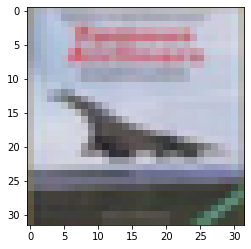

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('test_00003.png')
imgplot = plt.imshow(img)

In [31]:
print(img.shape)

(32, 32, 3)


In [36]:
from keras.preprocessing import image
import numpy as np
#ターゲット(画像)へのローカルパス
img_path = "/content/test_00010.png"

#画像を読み込む　:imgはサイズが224*224のPIL画像(Pythonで画像を処理するためのライブラリ)
img = image.load_img(img_path, target_size=(32,32))

#xは形状が(224,224，3)のfloat32型のNumPy配列
x = image.img_to_array(img)

#この配列がサイズが(1,224,224,3)のバッチに変換するために次元を追加
x = np.expand_dims(x, axis=0)

#予測ベクトルを人が読める形にデコード
preds = model.predict(x)

In [37]:
preds

array([[7.3867775e-02, 1.2337510e-02, 4.7721500e-03, 2.0168139e-02,
        7.0895527e-05, 8.1781703e-01, 2.6472870e-04, 7.0129760e-02,
        3.2166699e-05, 5.3980609e-04]], dtype=float32)

In [60]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:13]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [61]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(x)

全部の層の予測ベクトルを出すことができました。
しかし、特定の層だけを指定してベクトルを出すことができていない。


In [62]:
activations

[array([[[[ 14.375595  ,   0.        ,  38.65087   , ...,   0.        ,
            76.00491   ,  66.01965   ],
          [ 27.896832  ,  19.15766   ,  55.24817   , ...,   0.        ,
             0.        ,  10.293255  ],
          [ 28.248302  ,  19.313515  ,  55.54749   , ...,   0.        ,
             0.        ,  10.191176  ],
          ...,
          [ 46.45879   ,  29.832369  ,  60.80899   , ...,   7.4186893 ,
             0.        ,   3.0168247 ],
          [ 34.695347  ,  21.523619  ,  57.55794   , ...,   2.4625552 ,
             0.        ,   8.947002  ],
          [ 31.949755  ,  96.1645    ,  50.19539   , ...,   0.        ,
             0.        ,   0.        ]],
 
         [[  0.        ,   0.        ,  22.542923  , ...,   0.        ,
            99.817764  ,  67.54063   ],
          [  0.        ,   1.6030223 ,  18.795149  , ...,   0.66526294,
             0.        ,   0.        ],
          [  0.        ,   1.5289438 ,  18.94584   , ...,   0.        ,
             0

In [18]:
import numpy as np
first_layer_activation = activations[12]
print(first_layer_activation.shape)
#preds = first_layer_activation.predict(x)

(1, 1000)
